In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data = pd.read_excel("ship_data.xlsx")
df = pd.DataFrame(data)
df

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes
...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes
19996,SHIP019996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes
19997,SHIP019997,Hyderabad,Mumbai,2023-05-24,2023-05-27,2023-06-02,Trailer,1028,Rain,Moderate,Yes
19998,SHIP019998,Ahmedabad,Chennai,2023-05-02,2023-05-05,2023-05-08,Lorry,905,Fog,Moderate,Yes


In [3]:
#checking for any null values
df.isnull().any()

Shipment ID              False
Origin                   False
Destination              False
Shipment Date            False
Planned Delivery Date    False
Actual Delivery Date     False
Vehicle Type              True
Distance (km)            False
Weather Conditions       False
Traffic Conditions       False
Delayed                  False
dtype: bool

In [4]:
#checking for total null values
df.isnull().sum()

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64

In [5]:
#checking the data types of the columns present in the dataset
df.dtypes

Shipment ID                      object
Origin                           object
Destination                      object
Shipment Date            datetime64[ns]
Planned Delivery Date    datetime64[ns]
Actual Delivery Date     datetime64[ns]
Vehicle Type                     object
Distance (km)                     int64
Weather Conditions               object
Traffic Conditions               object
Delayed                          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Shipment ID            20000 non-null  object        
 1   Origin                 20000 non-null  object        
 2   Destination            20000 non-null  object        
 3   Shipment Date          20000 non-null  datetime64[ns]
 4   Planned Delivery Date  20000 non-null  datetime64[ns]
 5   Actual Delivery Date   20000 non-null  datetime64[ns]
 6   Vehicle Type           19403 non-null  object        
 7   Distance (km)          20000 non-null  int64         
 8   Weather Conditions     20000 non-null  object        
 9   Traffic Conditions     20000 non-null  object        
 10  Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.7+ MB


In [7]:
#finding total delay days 
df['delay_days'] = (df['Actual Delivery Date'] - df['Planned Delivery Date']).dt.days
df


,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,delay_days
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes,1
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes,4
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No,0
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No,0
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes,3
19996,SHIP019996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes,4
19997,SHIP019997,Hyderabad,Mumbai,2023-05-24,2023-05-27,2023-06-02,Trailer,1028,Rain,Moderate,Yes,6
19998,SHIP019998,Ahmedabad,Chennai,2023-05-02,2023-05-05,2023-05-08,Lorry,905,Fog,Moderate,Yes,3


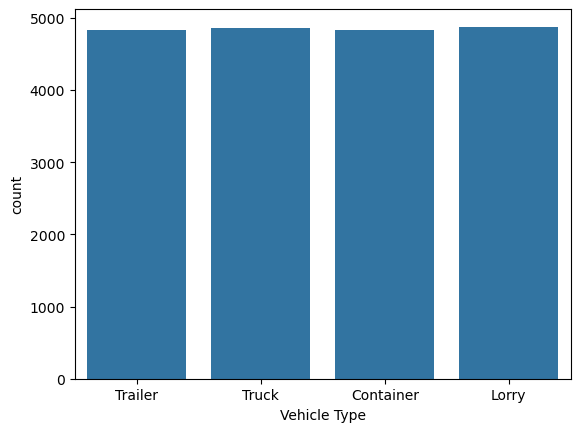

In [8]:
#from this we can say that no matter what vehicle type it may be there are equal number of times they are late
sns.countplot(x='Vehicle Type', data=df)
plt.show()

In [9]:
df = df.dropna(subset=['Vehicle Type'])
df = df.reset_index(drop=True)
df

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,delay_days
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes,1
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes,4
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No,0
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No,0
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...
19398,SHIP019995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes,3
19399,SHIP019996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes,4
19400,SHIP019997,Hyderabad,Mumbai,2023-05-24,2023-05-27,2023-06-02,Trailer,1028,Rain,Moderate,Yes,6
19401,SHIP019998,Ahmedabad,Chennai,2023-05-02,2023-05-05,2023-05-08,Lorry,905,Fog,Moderate,Yes,3


**Finding the unique values present in the columns**

In [10]:
unique_vehicle_type = df['Vehicle Type'].unique()
unique_vehicle_type

array(['Trailer', 'Truck', 'Container', 'Lorry'], dtype=object)

In [11]:
unique_weather_cond = df['Weather Conditions'].unique()
unique_weather_cond 

array(['Rain', 'Storm', 'Clear', 'Fog'], dtype=object)

In [12]:
unique_traffic_cond = df['Traffic Conditions'].unique()
unique_traffic_cond

array(['Light', 'Moderate', 'Heavy'], dtype=object)

**Performing EDA**

C:\Users\aamir\AppData\Local\Temp\ipykernel_11764\75289039.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delayed', data=df, palette='pastel')


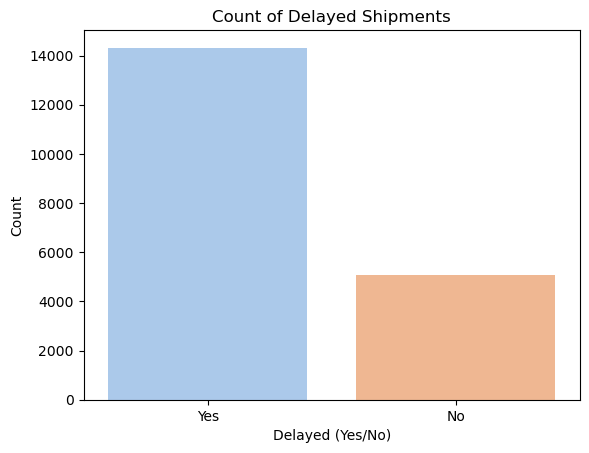

In [13]:
sns.countplot(x='Delayed', data=df, palette='pastel')
plt.title('Count of Delayed Shipments')
plt.xlabel('Delayed (Yes/No)')
plt.ylabel('Count')
plt.show()

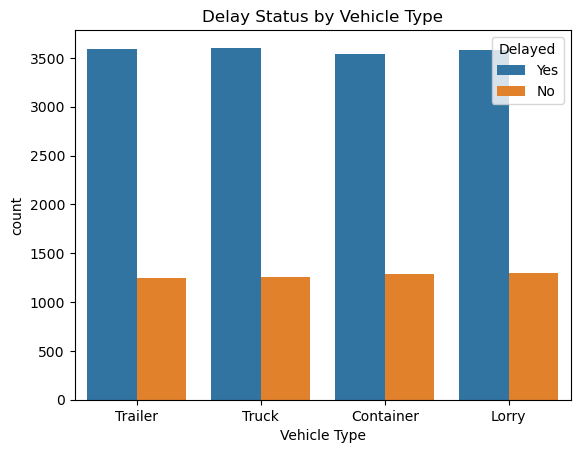

In [14]:
sns.countplot(x='Vehicle Type', hue='Delayed', data=df)
plt.title('Delay Status by Vehicle Type')
plt.show()

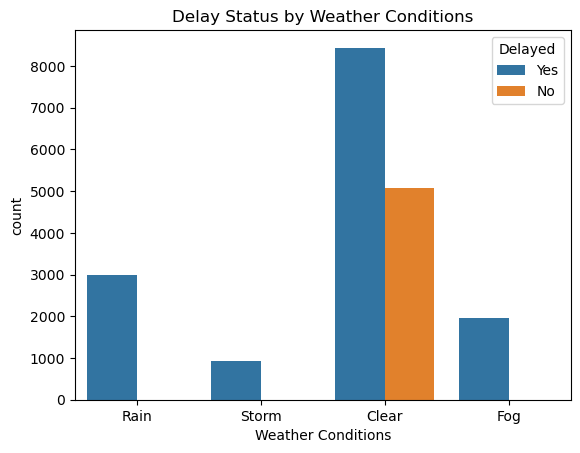

In [15]:
sns.countplot(x='Weather Conditions', hue='Delayed', data=df)
plt.title('Delay Status by Weather Conditions')
plt.show()

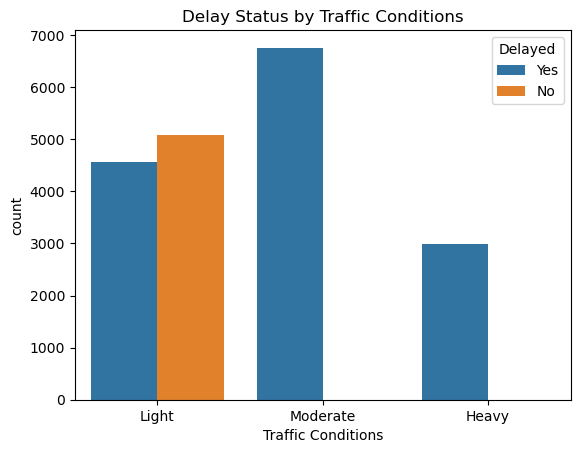

In [16]:
sns.countplot(x='Traffic Conditions', hue='Delayed', data=df)
plt.title('Delay Status by Traffic Conditions')
plt.show()


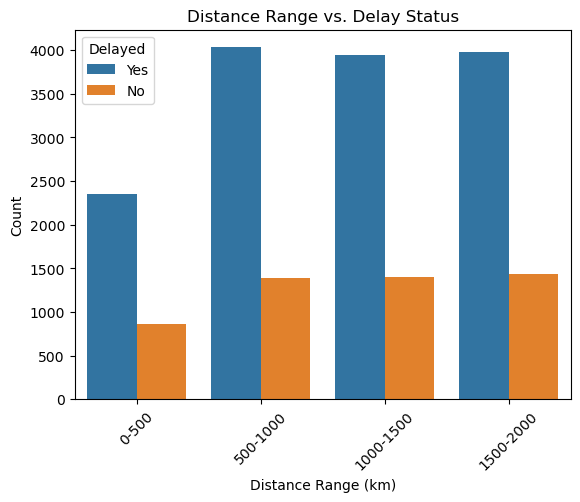

In [17]:
# Create bins for Distance (km) in intervals of 500
bins = range(0, int(df['Distance (km)'].max()) + 500, 500)
labels = [f"{i}-{i+500}" for i in bins[:-1]]
df['Distance Range'] = pd.cut(df['Distance (km)'], bins=bins, labels=labels, include_lowest=True)

sns.countplot(x='Distance Range', hue='Delayed', data=df)
plt.title('Distance Range vs. Delay Status')
plt.xticks(rotation=45)  
plt.xlabel('Distance Range (km)')
plt.ylabel('Count')
plt.show()


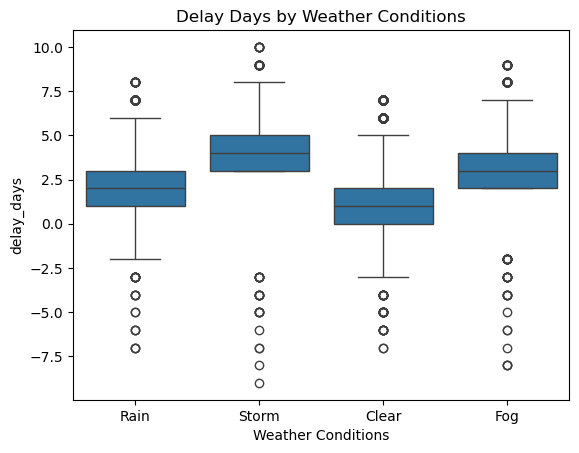

In [18]:
sns.boxplot(x='Weather Conditions', y='delay_days', data=df)
plt.title('Delay Days by Weather Conditions')
plt.show()


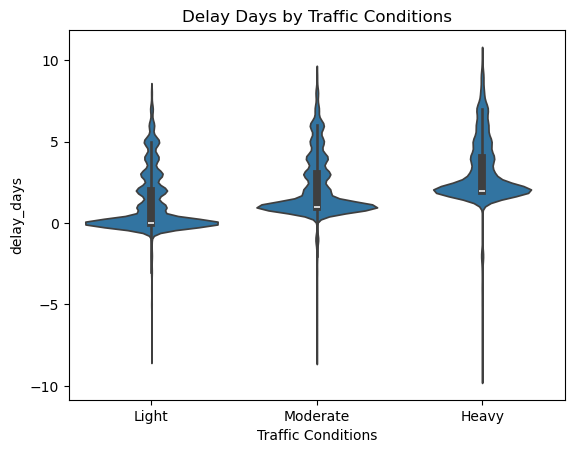

In [19]:
sns.violinplot(x='Traffic Conditions', y='delay_days', data=df)
plt.title('Delay Days by Traffic Conditions')
plt.show()

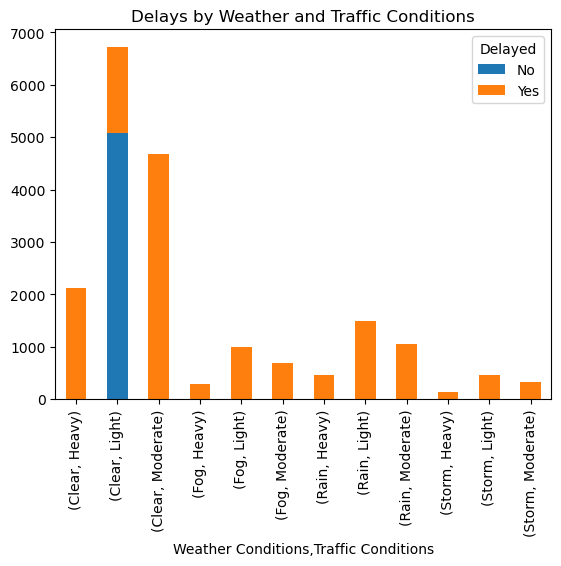

In [20]:
grouped = df.groupby(['Weather Conditions', 'Traffic Conditions', 'Delayed']).size().unstack()
grouped.plot(kind='bar', stacked=True)
plt.title('Delays by Weather and Traffic Conditions')
plt.show()


C:\Users\aamir\AppData\Local\Temp\ipykernel_11764\1012789970.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Weather Conditions', 'Traffic Conditions', 'Distance Bin', 'Delayed']).size().unstack()


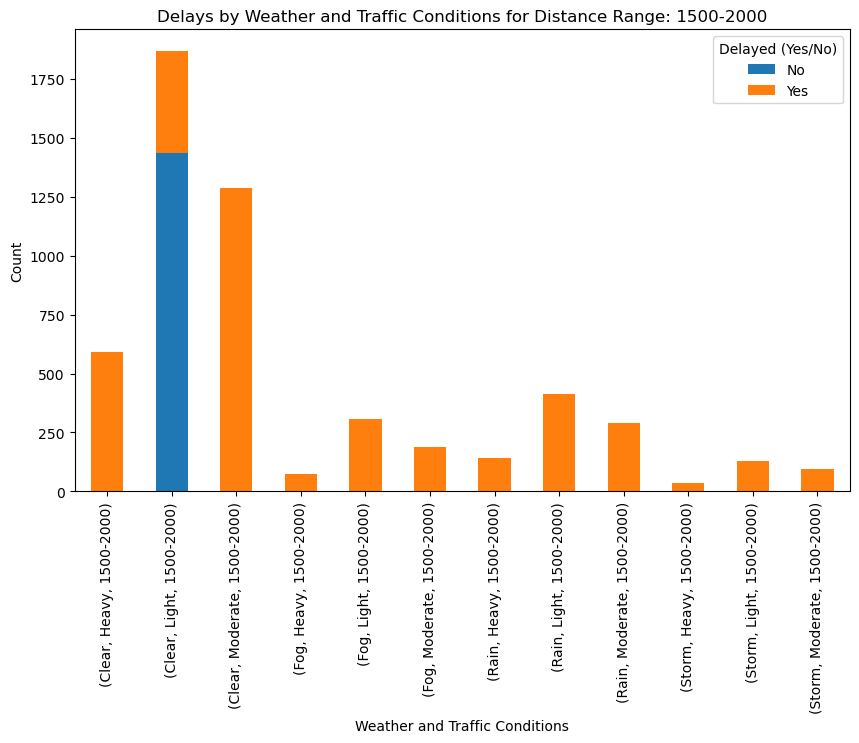

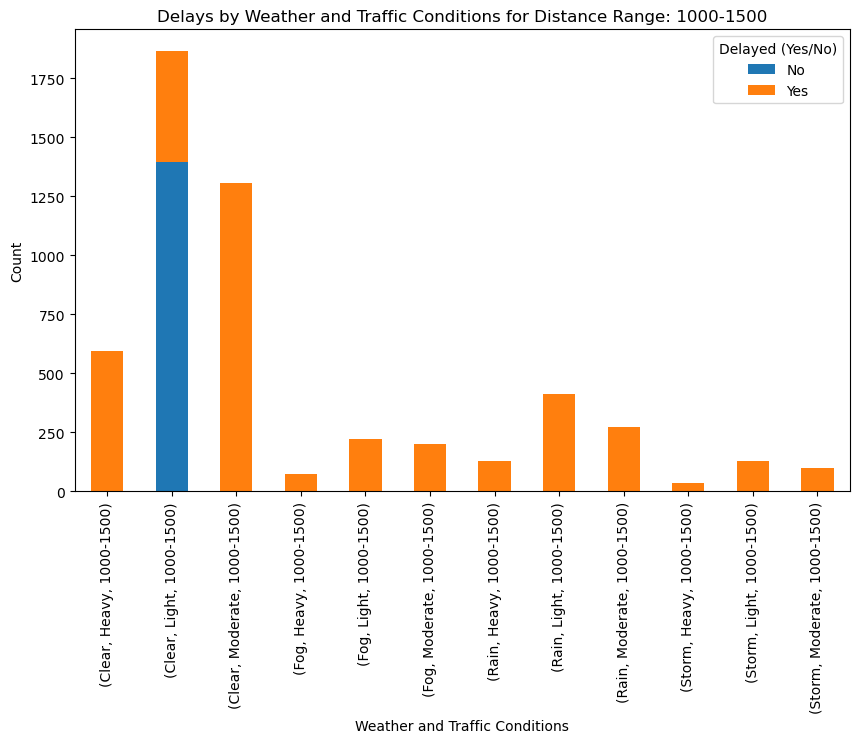

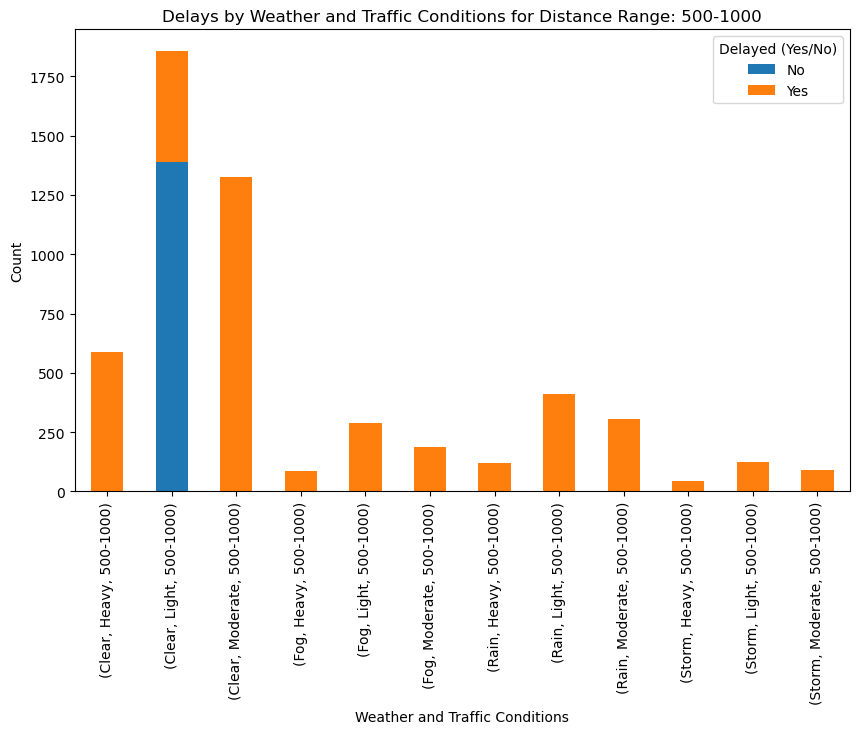

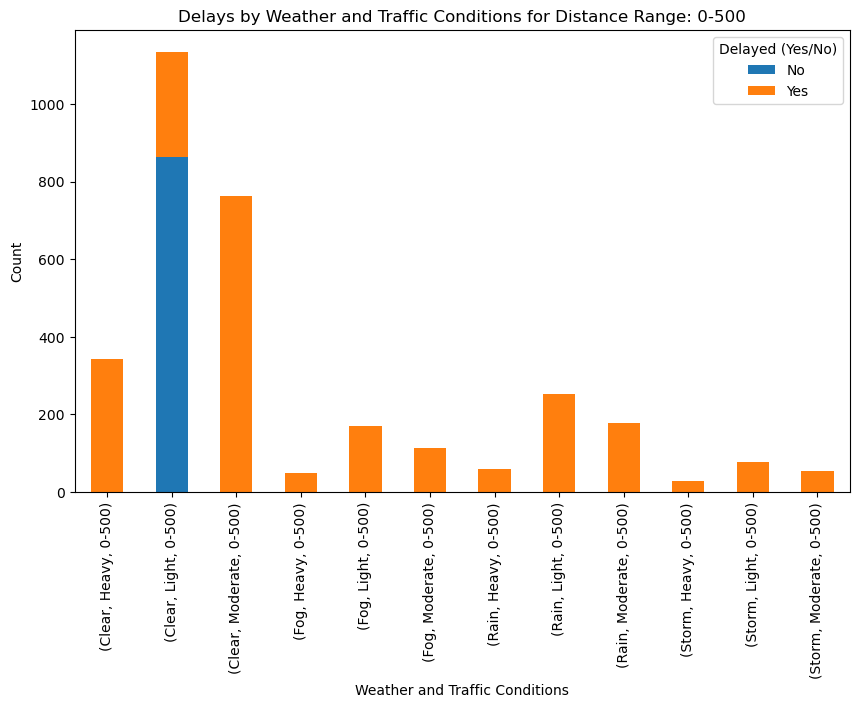

In [21]:
# Create bins for Distance (500 km intervals)
bin_edges = range(0, int(df['Distance (km)'].max()) + 500, 500)
df['Distance Bin'] = pd.cut(df['Distance (km)'], bins=bin_edges, labels=[f"{i}-{i+500}" for i in bin_edges[:-1]])

# Group by Weather Conditions, Traffic Conditions, Delayed, and Distance Bin
grouped = df.groupby(['Weather Conditions', 'Traffic Conditions', 'Distance Bin', 'Delayed']).size().unstack()

# Plot the grouped bar chart for each Distance Bin
for distance_bin in df['Distance Bin'].unique():
    if pd.notna(distance_bin):  
        subset = grouped.loc[grouped.index.get_level_values('Distance Bin') == distance_bin]
        subset.plot(kind='bar', stacked=True, figsize=(10,6))
        plt.title(f'Delays by Weather and Traffic Conditions for Distance Range: {distance_bin}')
        plt.ylabel('Count')
        plt.xlabel('Weather and Traffic Conditions')
        plt.legend(title='Delayed (Yes/No)', loc='upper right')
        plt.xticks(rotation=90)
        plt.show()

**The above plot shows us that no matter the distance the shipment is not delayed only when the weather is clear and the traffic is light**

In [22]:
df = df.drop(columns=['Shipment ID', 'Origin', 'Destination', 'Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date'])
df

,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,delay_days,Distance Range,Distance Bin
0,Trailer,1603,Rain,Light,Yes,1,1500-2000,1500-2000
1,Trailer,1237,Storm,Moderate,Yes,4,1000-1500,1000-1500
2,Truck,1863,Clear,Light,No,0,1500-2000,1500-2000
3,Container,1374,Clear,Light,No,0,1000-1500,1000-1500
4,Container,676,Clear,Heavy,Yes,2,500-1000,500-1000
...,...,...,...,...,...,...,...,...
19398,Truck,564,Fog,Moderate,Yes,3,500-1000,500-1000
19399,Truck,305,Storm,Moderate,Yes,4,0-500,0-500
19400,Trailer,1028,Rain,Moderate,Yes,6,1000-1500,1000-1500
19401,Lorry,905,Fog,Moderate,Yes,3,500-1000,500-1000


**Encoding the categorical Variables**

In [23]:
#encoding the variables
from sklearn.preprocessing import LabelEncoder
import pickle
label_encoder_delayed = LabelEncoder()
df['Delayed'] = label_encoder_delayed.fit_transform(df['Delayed'])
df

,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,delay_days,Distance Range,Distance Bin
0,Trailer,1603,Rain,Light,1,1,1500-2000,1500-2000
1,Trailer,1237,Storm,Moderate,1,4,1000-1500,1000-1500
2,Truck,1863,Clear,Light,0,0,1500-2000,1500-2000
3,Container,1374,Clear,Light,0,0,1000-1500,1000-1500
4,Container,676,Clear,Heavy,1,2,500-1000,500-1000
...,...,...,...,...,...,...,...,...
19398,Truck,564,Fog,Moderate,1,3,500-1000,500-1000
19399,Truck,305,Storm,Moderate,1,4,0-500,0-500
19400,Trailer,1028,Rain,Moderate,1,6,1000-1500,1000-1500
19401,Lorry,905,Fog,Moderate,1,3,500-1000,500-1000


In [24]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_weather = OneHotEncoder()
weather_encoder = onehot_encoder_weather.fit_transform(df[['Weather Conditions']])
weather_encoder

<19403x4 sparse matrix of type '<class 'numpy.float64'>'
	with 19403 stored elements in Compressed Sparse Row format>

In [25]:
onehot_encoder_weather.get_feature_names_out(['Weather Conditions'])

array(['Weather Conditions_Clear', 'Weather Conditions_Fog',
       'Weather Conditions_Rain', 'Weather Conditions_Storm'],
      dtype=object)

In [26]:
weather_encode_df = pd.DataFrame(weather_encoder.toarray(), columns=onehot_encoder_weather.get_feature_names_out(['Weather Conditions']))
weather_encode_df

,Weather Conditions_Clear,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
19398,0.0,1.0,0.0,0.0
19399,0.0,0.0,0.0,1.0
19400,0.0,0.0,1.0,0.0
19401,0.0,1.0,0.0,0.0


In [27]:
onehot_encoder_traffic = OneHotEncoder()
traffic_encoder = onehot_encoder_traffic.fit_transform(df[['Traffic Conditions']])
traffic_encoder

<19403x3 sparse matrix of type '<class 'numpy.float64'>'
	with 19403 stored elements in Compressed Sparse Row format>

In [28]:
onehot_encoder_traffic.get_feature_names_out(['Traffic Conditions'])

array(['Traffic Conditions_Heavy', 'Traffic Conditions_Light',
       'Traffic Conditions_Moderate'], dtype=object)

In [29]:
traffic_encode_df = pd.DataFrame(traffic_encoder.toarray(), columns=onehot_encoder_traffic.get_feature_names_out(['Traffic Conditions']))
traffic_encode_df

,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
19398,0.0,0.0,1.0
19399,0.0,0.0,1.0
19400,0.0,0.0,1.0
19401,0.0,0.0,1.0


In [30]:
df = pd.concat([df.drop(columns=['Traffic Conditions', 'Weather Conditions', 'Distance Range', 'Distance Bin'], axis = 1), traffic_encode_df, weather_encode_df],axis = 1)
df

,Vehicle Type,Distance (km),Delayed,delay_days,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Weather Conditions_Clear,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm
0,Trailer,1603,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Trailer,1237,1,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Truck,1863,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Container,1374,0,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Container,676,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19398,Truck,564,1,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0
19399,Truck,305,1,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19400,Trailer,1028,1,6,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19401,Lorry,905,1,3,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [31]:
df = df.drop(columns=['Vehicle Type', 'delay_days'], axis = 1)
df

,Distance (km),Delayed,Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Weather Conditions_Clear,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm
0,1603,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1237,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1863,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1374,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,676,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19398,564,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0
19399,305,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0
19400,1028,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
19401,905,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [32]:
#save the encoders 
with open('label_encoder_delayed.pkl', 'wb') as file:
    pickle.dump(label_encoder_delayed, file)

with open('onehot_encoder_weather.pkl', 'wb') as file:
    pickle.dump(onehot_encoder_weather, file)

with open('onehot_encoder_traffic.pkl', 'wb') as file:
    pickle.dump(onehot_encoder_traffic, file)



In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop('Delayed', axis = 1)
y = df['Delayed']

#split the data in training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [34]:
x_train

,Distance (km),Traffic Conditions_Heavy,Traffic Conditions_Light,Traffic Conditions_Moderate,Weather Conditions_Clear,Weather Conditions_Fog,Weather Conditions_Rain,Weather Conditions_Storm
10194,1654,1.0,0.0,0.0,1.0,0.0,0.0,0.0
14936,697,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10466,241,0.0,0.0,1.0,0.0,0.0,1.0,0.0
10202,235,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1479,810,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
11284,1465,0.0,0.0,1.0,1.0,0.0,0.0,0.0
11964,1909,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5390,1863,0.0,1.0,0.0,0.0,0.0,1.0,0.0
860,1603,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Why have we chosen the random forest model?

The random forest model is ideal for predicting shipment delays in freight logistics due to its suitability for the dataset:

1. Handles Mixed Data Types: 
Manages categorical (e.g., Origin, Weather) and numerical (e.g., Distance) features without extensive preprocessing.  
2. Captures Nonlinear Relationships: 
Models complex interactions between factors like Distance, Traffic, and Weather.  
3. Robust to Noise and Outliers: 
Averaging over multiple trees reduces the impact of irregular data points.  
4. Feature Importance: 
Identifies key factors affecting delays, aiding in strategic planning.  
5. Balances Imbalanced Data: 
Performs well even if "On time" shipments dominate.  
6. Accurate and Generalizable: 
Combines predictions from multiple trees for reliable performance on unseen data.  

Random Forest models

In [35]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define the Random Forest model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')  # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred)  # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred)  # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)  # Calculate ROC AUC

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate ROC AUC

# Print results
print("Random Forest Model")

print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')

print('Model performance for Test set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

print('=' * 35)



Random Forest Model
Model performance for Training set
- Accuracy: 0.9322
- F1 score: 0.9337
- Precision: 0.9813
- Recall: 0.9257
- ROC AUC Score: 0.9380
----------------------------------
Model performance for Test set
- Accuracy: 0.8895
- F1 score: 0.8921
- Precision: 0.9526
- Recall: 0.8952
- ROC AUC Score: 0.8842


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for Random Forest
rf_params = {
    "max_depth": [5, 8, 15, None, 10],
    "max_features": [5, 7, "sqrt", 8],  # Corrected: Removed "auto"
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500, 1000]
}

# Hyperparameter tuning for Random Forest
random_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_params,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit Random Forest model
random_rf.fit(x_train, y_train)

# Get the best parameters for Random Forest
best_rf_params = random_rf.best_params_

# Display best parameters
print("---------------- Best Params for Random Forest -------------------")
print(best_rf_params)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for Random Forest -------------------
{'n_estimators': 500, 'min_samples_split': 8, 'max_features': 8, 'max_depth': 8}


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=8,
    max_features='sqrt',
    max_depth=15
)

# Train the Random Forest model
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')  # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred)  # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred)  # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)  # Calculate ROC AUC

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate ROC AUC

# Print Results
print("Random Forest Model")
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')

print('Model performance for Test set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))


Random Forest Model
Model performance for Training set
- Accuracy: 0.9172
- F1 score: 0.9204
- Precision: 0.9999
- Recall: 0.8878
- ROC AUC Score: 0.9438
----------------------------------
Model performance for Test set
- Accuracy: 0.9108
- F1 score: 0.9145
- Precision: 0.9996
- Recall: 0.8798
- ROC AUC Score: 0.9394


In [39]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

why the xgboost model?

The XGBoost model is highly effective for predicting shipment delays in freight logistics due to its advanced capabilities and alignment with the dataset:

1. Handles Mixed Data: 
Efficiently processes categorical (e.g., Origin, Traffic) and numerical (e.g., Distance) features with minimal preprocessing.
2. Captures Complex Relationships: 
Models intricate interactions between factors like Weather, Traffic, and Distance.
3. Robust and Accurate: 
Combines gradient boosting with regularization to reduce overfitting and handle noisy data.
4. Feature Importance: 
Highlights the most influential factors, such as Traffic or Weather, aiding operational decisions.
5. Handles Imbalanced Data: 
Techniques like weighted loss functions improve performance on imbalanced datasets.
6. Efficient and Scalable: 
Optimized for large datasets, making it ideal for extensive logistics data.

Xgboost Model

In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Initialize XGBoost model
model = XGBClassifier()

# Train model
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')  # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred, average='weighted')  # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred, average='weighted')  # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])  # Calculate ROC AUC

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred, average='weighted')  # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred, average='weighted')  # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])  # Calculate ROC AUC

# Print Results
print("XGBoost Model")
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')

print('Model performance for Test set')
print("- Accuracy: {:.4f}".format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

print('=' * 35)
print('\n')


XGBoost Model
Model performance for Training set
- Accuracy: 0.9170
- F1 score: 0.9201
- Precision: 0.9364
- Recall: 0.9170
- ROC AUC Score: 0.9589
----------------------------------
Model performance for Test set
- Accuracy: 0.9111
- F1 score: 0.9147
- Precision: 0.9335
- Recall: 0.9111
- ROC AUC Score: 0.9417




In [41]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid for XGBoost
xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20, 30],
    "n_estimators": [100, 200, 300],
    "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]
}

# Perform RandomizedSearchCV for XGBoost
random = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=xgboost_params,
    n_iter=100,
    cv=3,
    verbose=2,
    n_jobs=-1
)

random.fit(x_train, y_train)

# Display best parameters
print("---------------- Best Params for XGBoost -------------------")
print(random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for XGBoost -------------------
{'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.4}


In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

# Define the XGBoost model with the chosen hyperparameters
xgboost_model = XGBClassifier(n_estimators=200, max_depth=12, learning_rate=0.1, colsample_bytree=0.3)

# Train the model
xgboost_model.fit(x_train, y_train)

# Make predictions
y_train_pred = xgboost_model.predict(x_train)
y_test_pred = xgboost_model.predict(x_test)

# Training set performance
model_train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate Accuracy
model_train_f1 = f1_score(y_train, y_train_pred, average='weighted')  # Calculate F1-score
model_train_precision = precision_score(y_train, y_train_pred)  # Calculate Precision
model_train_recall = recall_score(y_train, y_train_pred)  # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)  # Calculate ROC AUC

# Test set performance
model_test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate Accuracy
model_test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # Calculate F1-score
model_test_precision = precision_score(y_test, y_test_pred)  # Calculate Precision
model_test_recall = recall_score(y_test, y_test_pred)  # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)  # Calculate ROC AUC

# Print results
print("XGBoost Model")

print('Model performance for Training set')
print('- Accuracy: {:.4f}'.format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

print('----------------------------------')

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

print('=' * 35)


XGBoost Model
Model performance for Training set
- Accuracy: 0.9169
- F1 score: 0.9201
- Precision: 1.0000
- Recall: 0.8873
- ROC AUC Score: 0.9437
----------------------------------
Model performance for Test set
- Accuracy: 0.9111
- F1 score: 0.9147
- Precision: 1.0000
- Recall: 0.8798
- ROC AUC Score: 0.9399


In [43]:
import joblib

# Save the model
joblib.dump(model, 'xgboost_model.pkl')

['xgboost_model.pkl']